# A) Data Loading and Exploration

### 1. Import necessary libraries.

In [261]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

### 2. Display a sample of five rows of the data frame.

In [262]:
sales_df = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

In [263]:
sales_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.


In [264]:
sales_df.shape

(2823, 25)

In [265]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### 4. Check the percentage of missing values in each column of the data frame.


In [266]:
sales_df.isnull().sum()/len(sales_df)

ORDERNUMBER         0.000000
QUANTITYORDERED     0.000000
PRICEEACH           0.000000
ORDERLINENUMBER     0.000000
SALES               0.000000
ORDERDATE           0.000000
STATUS              0.000000
QTR_ID              0.000000
MONTH_ID            0.000000
YEAR_ID             0.000000
PRODUCTLINE         0.000000
MSRP                0.000000
PRODUCTCODE         0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
ADDRESSLINE2        0.893022
CITY                0.000000
STATE               0.526390
POSTALCODE          0.026922
COUNTRY             0.000000
TERRITORY           0.380446
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
DEALSIZE            0.000000
dtype: float64

*Four columns ADDRESSLINE2, STATE, POSTALCODE, TERRITORY has missing values.*

### 5. Check if there are any duplicate rows.

In [267]:
sales_df.duplicated().sum()

0

*There are no duplicate rows in the dataset*

### 6. Write a function that will impute missing values of the columns “STATE”,“POSTALCODE”,“TERRITORY” with its most occurring label.

In [268]:
sales_df['STATE'] = sales_df['STATE'].fillna(sales_df['STATE'].mode()[0])
sales_df['POSTALCODE'] = sales_df['POSTALCODE'].fillna(sales_df['POSTALCODE'].mode()[0])
sales_df['TERRITORY'] = sales_df['TERRITORY'].fillna(sales_df['TERRITORY'].mode()[0])

In [269]:
sales_df[['STATE', 'POSTALCODE', 'TERRITORY']].isnull().sum()

STATE         0
POSTALCODE    0
TERRITORY     0
dtype: int64

*Hence we successfully imputed the missing values in STATE, POSTALCODE and TERRITORY columns with their most occuring label*

### 7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.

In [270]:
sales_df = sales_df.drop(['ADDRESSLINE2', 'ORDERDATE', 'PHONE'], axis = 1)

In [271]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

*Hence we dropped the columns ADDRESSLINE2, ORDERDATE and PHONE from the dataframe.*

### 8. Convert the labels of the STATUS column to 0 and 1. For Shipped assign value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ InProcess’, 'Disputed') assign 0.

In [272]:
sales_df['STATUS'].value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [273]:
sales_df['STATUS'].replace(to_replace = 'Shipped', value = '1', inplace = True)
sales_df['STATUS'].replace(to_replace = ['Cancelled', 'Resolved', 'On Hold', 'In Process', 'Disputed'], value = '0', inplace= True)

In [274]:
sales_df['STATUS'].value_counts()

STATUS
1    2617
0     206
Name: count, dtype: int64

*Hence we made the necessary conversion of STATUS column labels to 1's and 0's as mentioned*

### 9. Assign ‘STATUS’ column into a label variable and drop it from the original Dataframe. Convert the original dataframe to the dummy coded data.

In [275]:
sales_df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,1,1,2,2003,Motorcycles,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,1,2,5,2003,Motorcycles,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small


In [276]:
# Assigning target column STATUS to y and remaining columns as x
y = sales_df['STATUS']
x = sales_df.drop(['STATUS'], axis=1)

In [277]:
print(y.shape)
print(x.shape)

(2823,)
(2823, 21)


In [278]:
#Converting the original data into dummy encoded data
x_dum = pd.get_dummies(x)

In [279]:
x_dum.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,...,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.0,1,2,2003,95,False,...,False,False,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2765.9,2,5,2003,95,False,...,False,False,False,False,False,False,False,False,False,True


In [280]:
x_dum.shape

(2823, 645)

### 10. Use StandardScaler to scale the data.

In [281]:
sc = StandardScaler()
x_dum_std = sc.fit_transform(x_dum)

In [282]:
x_dum_std

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

# B) PCA FOR VISUALIZATION

### 1. Take the help of PCA to reduce the data to 2 dimensions. Use n_components=2.

In [283]:
# converting the data in to 2 dimension using PCA
pca_sales = PCA(n_components = 2)
principalComponents_sales = pca_sales.fit_transform(x_dum_std)

In [284]:
# output of PCA, data converted into 2 dimensions
principalComponents_sales

array([[-0.73493131, -1.04877978],
       [-1.52184672,  1.55632939],
       [-1.65374798,  0.21603074],
       ...,
       [-1.63633061,  0.74507083],
       [-0.82367783,  0.39217466],
       [-0.97361542, -2.25937317]])

In [285]:
# Creating a DataFrame with principal component values for all the samples
pricipal_sales_df = pd.DataFrame(data = principalComponents_sales, 
                                 columns = ['principal component 1', 'principal component 2'])

pricipal_sales_df.head(2)

,principal component 1,principal component 2
0,-0.734931,-1.048780
1,-1.521847,1.556329


### 2. Take the first and second principal components and plot a scatter plot with the labels.

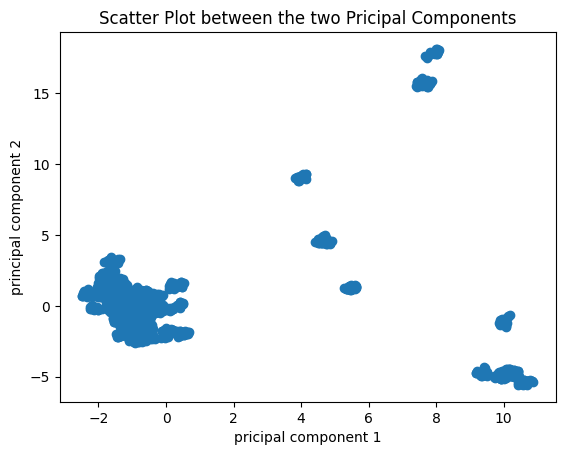

In [286]:
plt.scatter(pricipal_sales_df['principal component 1'], pricipal_sales_df['principal component 2'])
plt.xlabel('pricipal component 1')
plt.ylabel('principal component 2')
plt.title('Scatter Plot between the two Pricipal Components')
plt.show()

### 3. Write the intuitions about the scatter plot.

*From the above scatter plot we can conclude that the two created Principal Componets are uncorrelated.
Hence we are able to convert very high dimensional space to 2 uncorrelated features in the low dimensional space*

# C) PCA FOR DIMENSION REDUCTION.

### 1. Fit the PCA model on the data and plot a graph between n_components and cumulative explained variance.

In [287]:
# fitting the PCA model on n_components
pca_n = PCA()
pca_n.fit(x_dum_std)

PCA()

In [288]:
# Checking the explained variance ratio array generated by the PCA fit
pca_n.explained_variance_ratio_

array([1.56555784e-02, 1.37971180e-02, 1.31614833e-02, 1.25638313e-02,
       1.19716767e-02, 1.17872831e-02, 1.16321228e-02, 1.13587421e-02,
       1.13277724e-02, 1.12784643e-02, 1.11973421e-02, 1.11385032e-02,
       1.11156207e-02, 1.10849620e-02, 1.10301595e-02, 1.10197617e-02,
       1.10028261e-02, 1.09593390e-02, 1.09003339e-02, 1.08448778e-02,
       1.07601945e-02, 1.05829303e-02, 1.05467225e-02, 1.03524721e-02,
       1.03389064e-02, 1.01526613e-02, 1.01203325e-02, 9.99203139e-03,
       9.89242376e-03, 9.84634898e-03, 9.72928002e-03, 9.68707614e-03,
       9.62284104e-03, 9.59732842e-03, 9.57066401e-03, 9.56011405e-03,
       9.50518825e-03, 9.48980366e-03, 9.46451128e-03, 9.45479572e-03,
       9.45221100e-03, 9.44484810e-03, 9.43188816e-03, 9.43047569e-03,
       9.42566975e-03, 9.41704353e-03, 9.41498524e-03, 9.41000792e-03,
       9.40222507e-03, 9.39043571e-03, 9.26638412e-03, 9.13102723e-03,
       9.04131824e-03, 8.91132414e-03, 8.85179193e-03, 8.74562418e-03,
      

In [289]:
# calculating cumulative explained variance ratio
var_explained = pca_n.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)

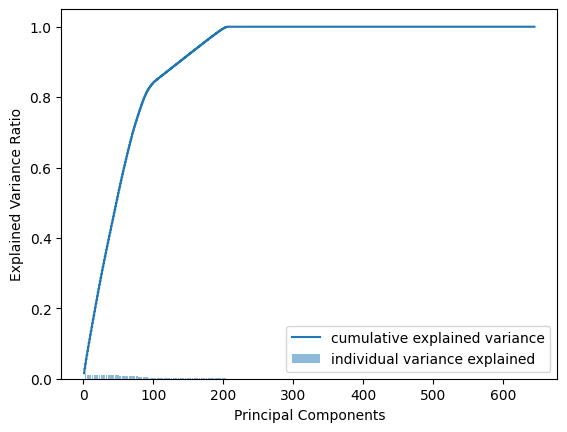

In [290]:
# ploting a bar graph and step graph to between n_components and cumulative explained variance ratio
n = len(pca_n.explained_variance_ratio_)
plt.bar(range(1,n+1), var_explained, alpha = 0.5, align = 'center', label = 'individual variance explained')
plt.step(range(1, n+1), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

### 2. In how many components we are getting approximately 90% of explained Variance.

In [291]:
# calculating the the minimum number of components required which can get approximately 90% explained variance
sum = 0
n = len(var_explained)
for i in range(0, n):
    sum += var_explained[i]
    if sum >= 0.9:
        break
print(i, sum)
    

137 0.9013586005914469


*From the previous graph we can see that for some where between 100 and 200 components the cumulative explained variance is crossing 90%.
To calculate the exact number of components required through which 90% of variance can be explained, I used the code in the above cell. It is showing that with 137 components, we can cover the variance above 90%.* 
<br>
**Hence the required number of components = 137**

# D) LDA.

### 1. Split the dataset into two parts (i.e. 80% train and 20% test) using random_state=42. 

In [292]:
X = x_dum_std
Y = np.asarray(y)

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [294]:
print(X_train.shape)
print(Y_train.shape)

(2258, 645)
(2258,)


In [295]:
print(X_test.shape)
print(Y_test.shape)

(565, 645)
(565,)


### 2. Train a Linear Discriminant Analysis(LDA) model on the train data. Do fit_transform on the train data and only transform on the test data. Use n_components=1.

In [296]:
lda = LinearDiscriminantAnalysis(n_components = 1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

### 3. Train a RandomForest classifier model on the transformed train and test data. Print the accuracy score. 

In [297]:
# Training the RandomForestClassifier model on transformed train and test data
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [298]:
# Printing the Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, Y_pred))

Accuracy Score:  0.9026548672566371


**Hence we got an accuracy of 90.26% in predicting which of the products has been shipped and which of the products has been cancelled using the LDA model**